# Brain Stroke Analysis and Prediction

Data: 
- gender, age
- bmi, hypertension, heartdesease, avg_glucose_level, smoking_status
- ever_married, work_type, residence_type
- stroke (0 or 1)

TODO:
1. 对每个性状与是否中风的影响画图 - 条形图、饼图等
2. 显著性分析 - 某个性状对中风是否有影响
3. correlation map
4. 分类模型训练与准确度对比 - Naive Bayes (Bernoulli & Gaussian), Logistic Regression, K-Nearest Neighbor, Random Forest, Support Vector Machine)

Report: （找双列的报告模板）
1. Background
2. Dataset Discription
3. Data Analysis and Visualization
4. Model Training and Evaluation （每个模型放公式）
5. Conclusion

## Data Analysis

### Basic Exploration

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [12]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
df[categorical_columns].describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


binary columns (only includes 0 and 1, or two types):
- gender (female, male)
- hypertension (0, 1)
- heart_disease (0, 1)
- ever_married (Yes, No)
- Residence_type (Urban, Rural)
- stroke (0, 1)

### Analysis on Stroke Patients' Gender

In [34]:
df = df[df["gender"] != "Other"]

In [41]:
df_gender = df.groupby(["gender", "stroke"]).size().unstack(fill_value=0)
df_gender.columns = ["No Stroke", "Stroke"]
df_gender["Stroke Ratio"] = df_gender["Stroke"] / (df_gender["Stroke"] + df_gender["No Stroke"])
df_gender

,No Stroke,Stroke,Stroke Ratio
gender,,,
Female,2853,141,0.047094
Male,2007,108,0.051064


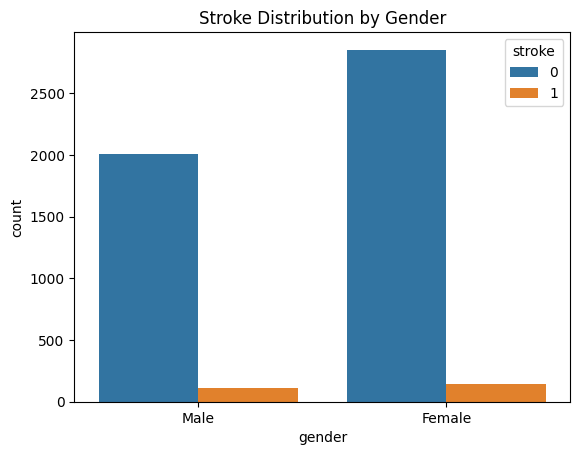

In [40]:
sns.countplot(x='gender', hue='stroke', data=df)
# plt.yscale('log')
plt.title('Stroke Distribution by Gender')
plt.show()

Chi-squared test: \
（性别和中风这两个变量是类别变量（categorical variables），因此更适合使用 卡方检验（Chi-squared test） 来进行显著性分析。）
- chi2_stat: 卡方统计量，用于衡量实际值和预期值之间的差异。
- p_value: 显著性水平，如果 p_value < 0.05，说明性别和中风之间有显著关系。
- dof: 自由度，等于 (行数 - 1) * (列数 - 1)。
- expected: 根据零假设计算的预期频数。

In [44]:
contingency_table = pd.crosstab(df['gender'], df['stroke'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

if p_value < 0.05:
    print("There is a significant relationship between gender and stroke.")
else:
    print("There is no significant relationship between gender and stroke.")

Chi2 Statistic: 0.340002536046177
P-Value: 0.5598277580669416
Degrees of Freedom: 1
Expected Frequencies: 
[[2848.07985907  145.92014093]
 [2011.92014093  103.07985907]]
There is no significant relationship between gender and stroke.


Proportion Test:\
用于比较两个群体中某一事件发生的比例是否相等，可以用Z-Test来进行比例检验。
- count: 每个性别中风的数量。
- nobs: 每个性别的总人数。
- proportions_ztest: 进行比例检验，返回 Z 统计量和 p 值。
- 如果 p-value < 0.05，表示性别和中风的比例差异显著；否则，表示差异不显著。
- 如果 Z-statistic 很大（比如绝对值大于 1.96），说明两组数据差异显著，拒绝零假设。
- 如果 Z-statistic 的值接近零，表示没有显著差异，支持零假设。

In [48]:
# ! pip install statsmodels

In [47]:
from statsmodels.stats.proportion import proportions_ztest
count = df.groupby('gender')['stroke'].sum()
nobs = df['gender'].value_counts()
stat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic: {stat}, p-value: {pval}")

if pval < 0.05:
    print("There is a significant difference in stroke rates between genders.")
else:
    print("There is no significant difference in stroke rates between genders.")

Z-statistic: -0.6490565013589283, p-value: 0.5163018564037076
There is no significant difference in stroke rates between genders.


### Analysis on Stroke Patients' Age

## Model Training and Evaluation